In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
df = pd.read_csv('cleaned_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  in

In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [6]:
X = df['LIMIT_BAL'].values.reshape(-1,1)

In [7]:
y = df['default payment next month'].values

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [9]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (21331, 1)
y_train (21331,)
X_test (5333, 1)
y_test (5333,)


_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
y_pred = lr.predict(X_test)

In [12]:
is_correct = y_pred == y_test
np.mean(is_correct)

0.7800487530470654

In [13]:
lr.score(X_test, y_test)

0.7800487530470654

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [14]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba

array([[0.56836876, 0.43163124],
       [0.55141737, 0.44858263],
       [0.65003597, 0.34996403],
       ...,
       [0.60175865, 0.39824135],
       [0.89404966, 0.10595034],
       [0.91207114, 0.08792886]])

In [35]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.43163124, 0.44858263, 0.34996403, ..., 0.39824135, 0.10595034,
       0.08792886])

In [36]:
# pos_sample_pos_proba = pos_proba[y_test==1]
# neg_sample_pos_proba = pos_proba[y_test==0]

_________________________________________________________________________
**Now, plot the ROC curve.**


In [37]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

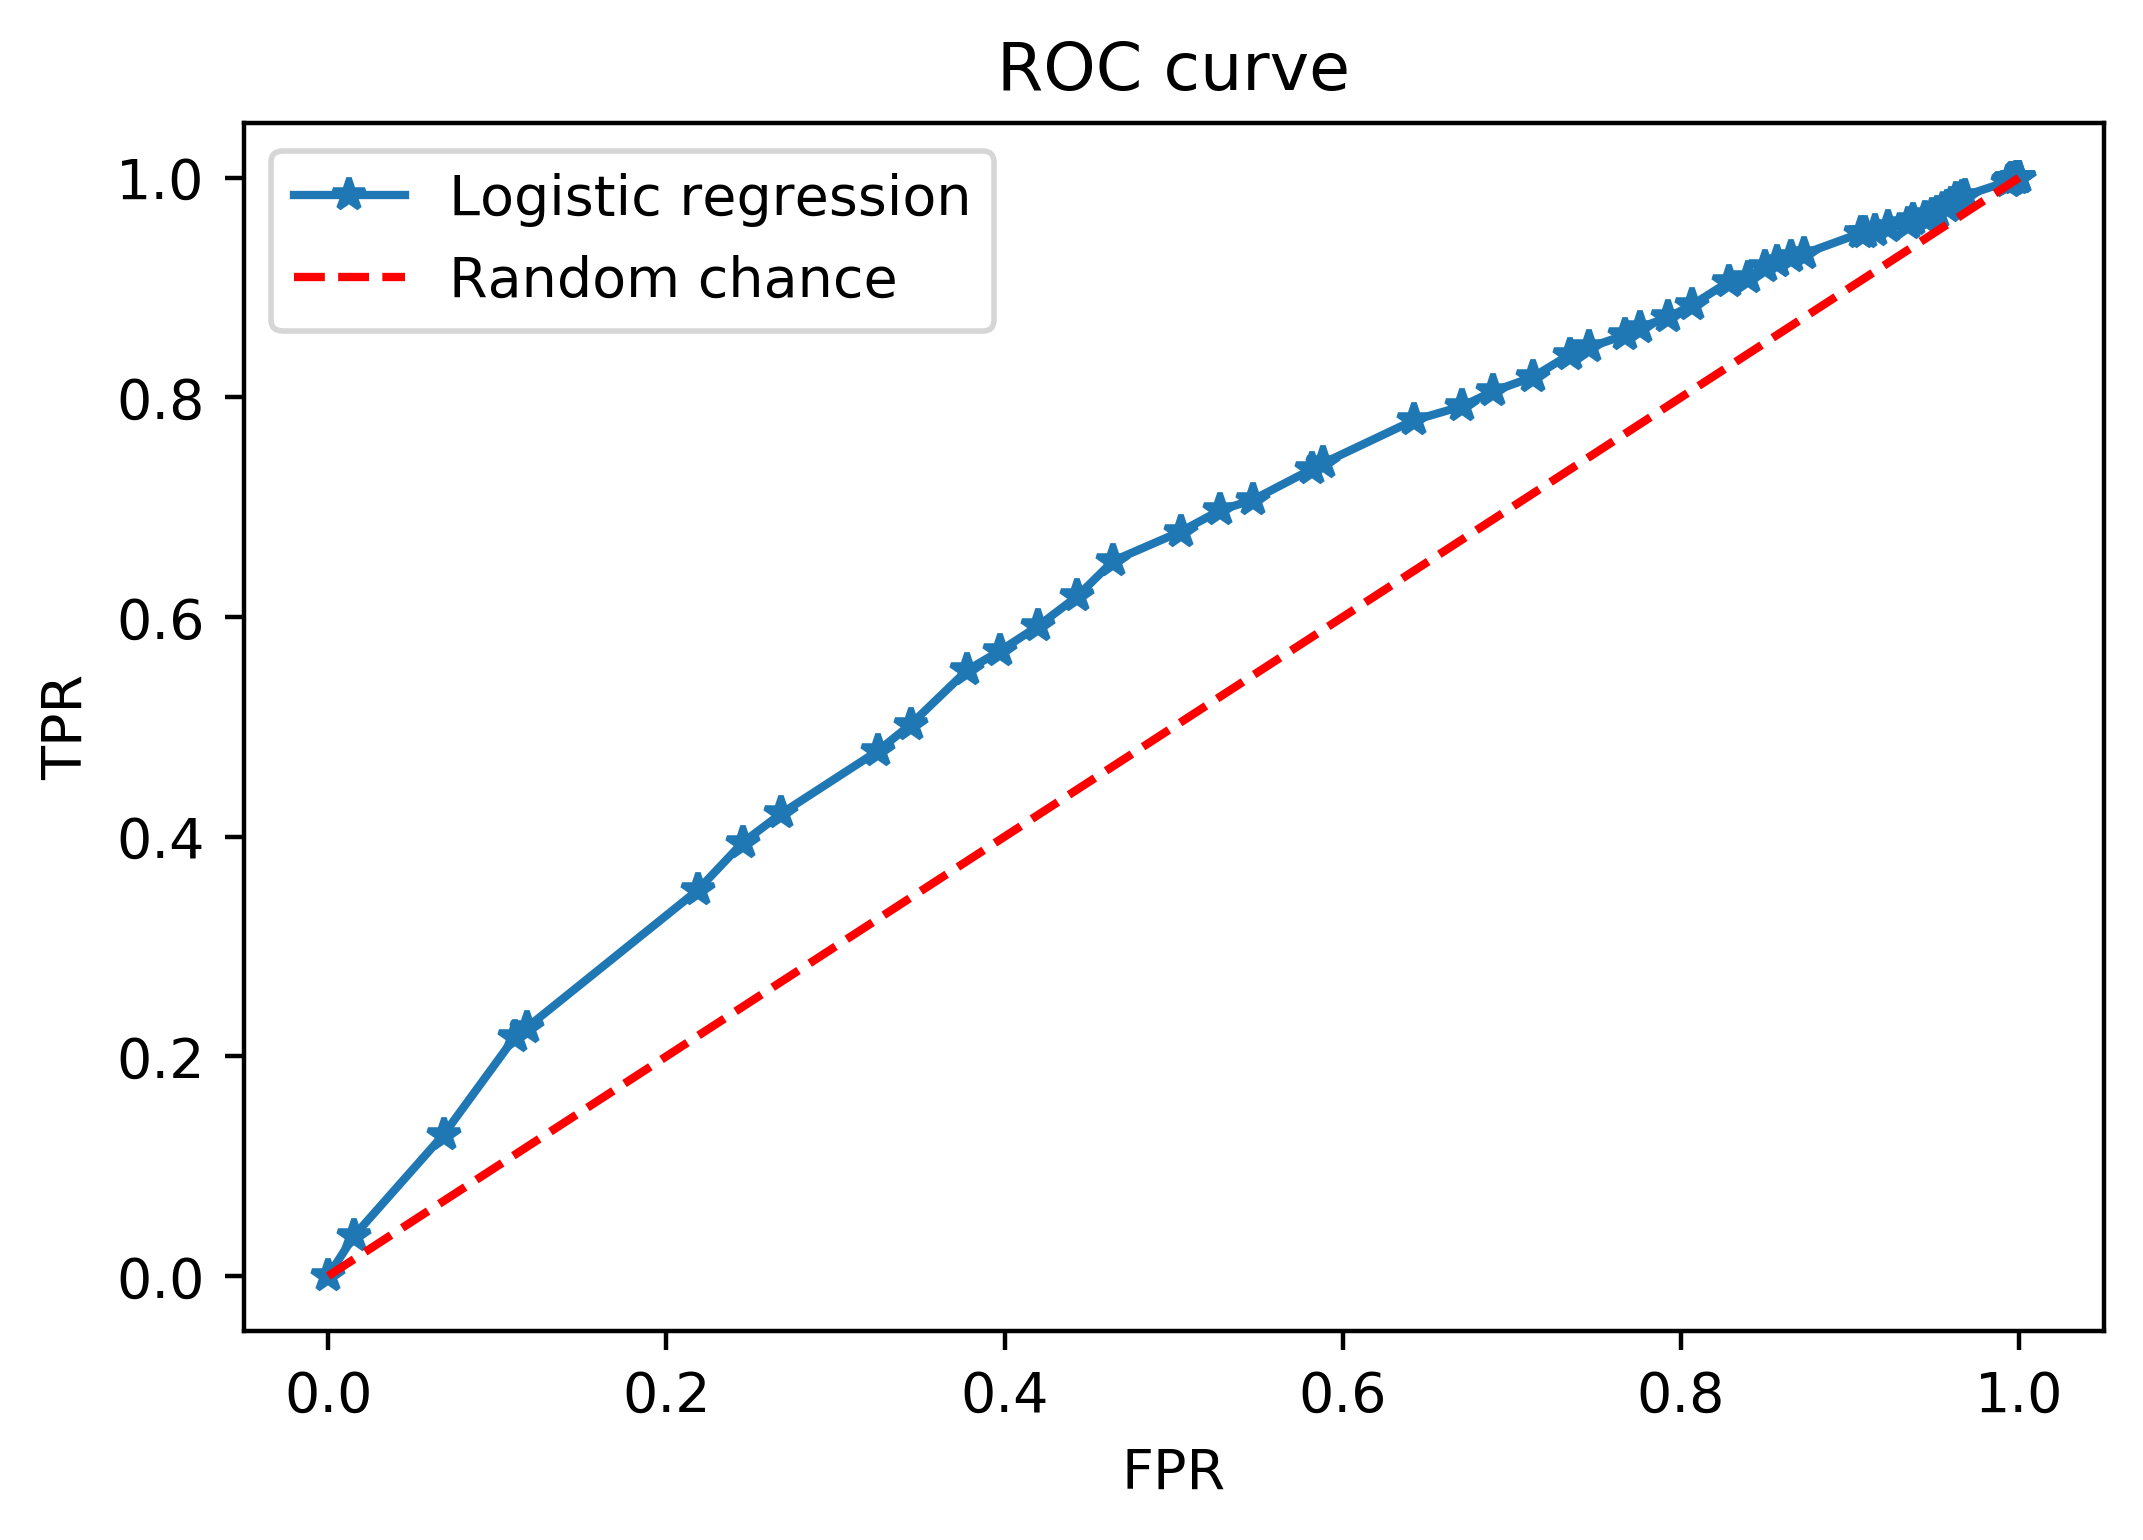

In [38]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [19]:
metrics.roc_auc_score(y_test, pos_proba)

0.6125146526001705

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [20]:
from sklearn.metrics import precision_recall_curve

In [21]:
precision, recall, thresholds = precision_recall_curve(y_test, pos_proba)

In [22]:
precision

array([0.22028169, 0.22013524, 0.22021796, 0.22030075, 0.2203836 ,
       0.220508  , 0.22054949, 0.22063253, 0.22052731, 0.22056885,
       0.2206104 , 0.22054665, 0.22052443, 0.22273692, 0.22293117,
       0.22308438, 0.22289274, 0.22287276, 0.22289866, 0.22307541,
       0.22340846, 0.22434368, 0.2243513 , 0.22589754, 0.2267371 ,
       0.22762566, 0.22804504, 0.23116003, 0.23213143, 0.23300344,
       0.23363676, 0.23387451, 0.23558119, 0.23611111, 0.23698218,
       0.23891509, 0.23951382, 0.24224664, 0.24368499, 0.24471068,
       0.24796641, 0.24979833, 0.25495119, 0.26184012, 0.26256473,
       0.26707474, 0.27149021, 0.27489627, 0.28338279, 0.28260023,
       0.28442623, 0.28768303, 0.29157278, 0.29129575, 0.29310345,
       0.307023  , 0.31220499, 0.31188494, 0.35192563, 0.35714286,
       0.34712644, 0.40186916, 1.        ])

In [23]:
 recall

array([1.        , 0.99914749, 0.99914749, 0.99914749, 0.99914749,
       0.99914749, 0.99914749, 0.99914749, 0.99829497, 0.99829497,
       0.99829497, 0.99744246, 0.99658994, 0.98380222, 0.9829497 ,
       0.98039216, 0.97612958, 0.97357204, 0.96760443, 0.9658994 ,
       0.96334186, 0.96163683, 0.95822677, 0.95481671, 0.95140665,
       0.94970162, 0.94970162, 0.93094629, 0.92753623, 0.92327366,
       0.91901108, 0.9087809 , 0.90537084, 0.88405797, 0.87297528,
       0.86359761, 0.85677749, 0.8456948 , 0.83887468, 0.81841432,
       0.8056266 , 0.79198636, 0.77919864, 0.73998295, 0.73486786,
       0.70673487, 0.6973572 , 0.67774936, 0.6513214 , 0.61892583,
       0.59164535, 0.56947997, 0.55157715, 0.50213129, 0.47826087,
       0.42114237, 0.39471441, 0.35123615, 0.22591645, 0.2173913 ,
       0.12872975, 0.03665814, 0.        ])

In [24]:
thresholds

array([0.01294033, 0.01482095, 0.01585978, 0.01697017, 0.01815686,
       0.01942491, 0.02077963, 0.0222267 , 0.02377209, 0.02542213,
       0.02718352, 0.0290633 , 0.03106893, 0.03320823, 0.03548943,
       0.0379212 , 0.04051259, 0.0432731 , 0.04621266, 0.0493416 ,
       0.05267069, 0.05621112, 0.05997446, 0.06397269, 0.06821811,
       0.07272338, 0.07750144, 0.08256547, 0.08792886, 0.0936051 ,
       0.09960775, 0.10595034, 0.11264627, 0.11970872, 0.1271505 ,
       0.13498397, 0.14322085, 0.15187212, 0.16094779, 0.17045681,
       0.18040685, 0.1908041 , 0.20165314, 0.21295671, 0.22471554,
       0.2369282 , 0.24959092, 0.26269741, 0.27623879, 0.29020345,
       0.30457698, 0.31934213, 0.33447879, 0.34996403, 0.36577216,
       0.38187487, 0.39824135, 0.41483852, 0.43163124, 0.44858263,
       0.46565432, 0.48280686])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [25]:
y_pred_train_proba = lr.predict_proba(X_train)
y_pred_train_proba

array([[0.85677915, 0.14322085],
       [0.53434568, 0.46565432],
       [0.72376121, 0.27623879],
       ...,
       [0.89404966, 0.10595034],
       [0.81959315, 0.18040685],
       [0.77528446, 0.22471554]])

In [42]:
pos_proba_train = y_pred_train_proba[:,1]
pos_proba_train

array([0.14322085, 0.46565432, 0.27623879, ..., 0.10595034, 0.18040685,
       0.22471554])

In [43]:
from sklearn import metrics
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, pos_proba_train)

Text(0.5, 1.0, 'ROC curve')

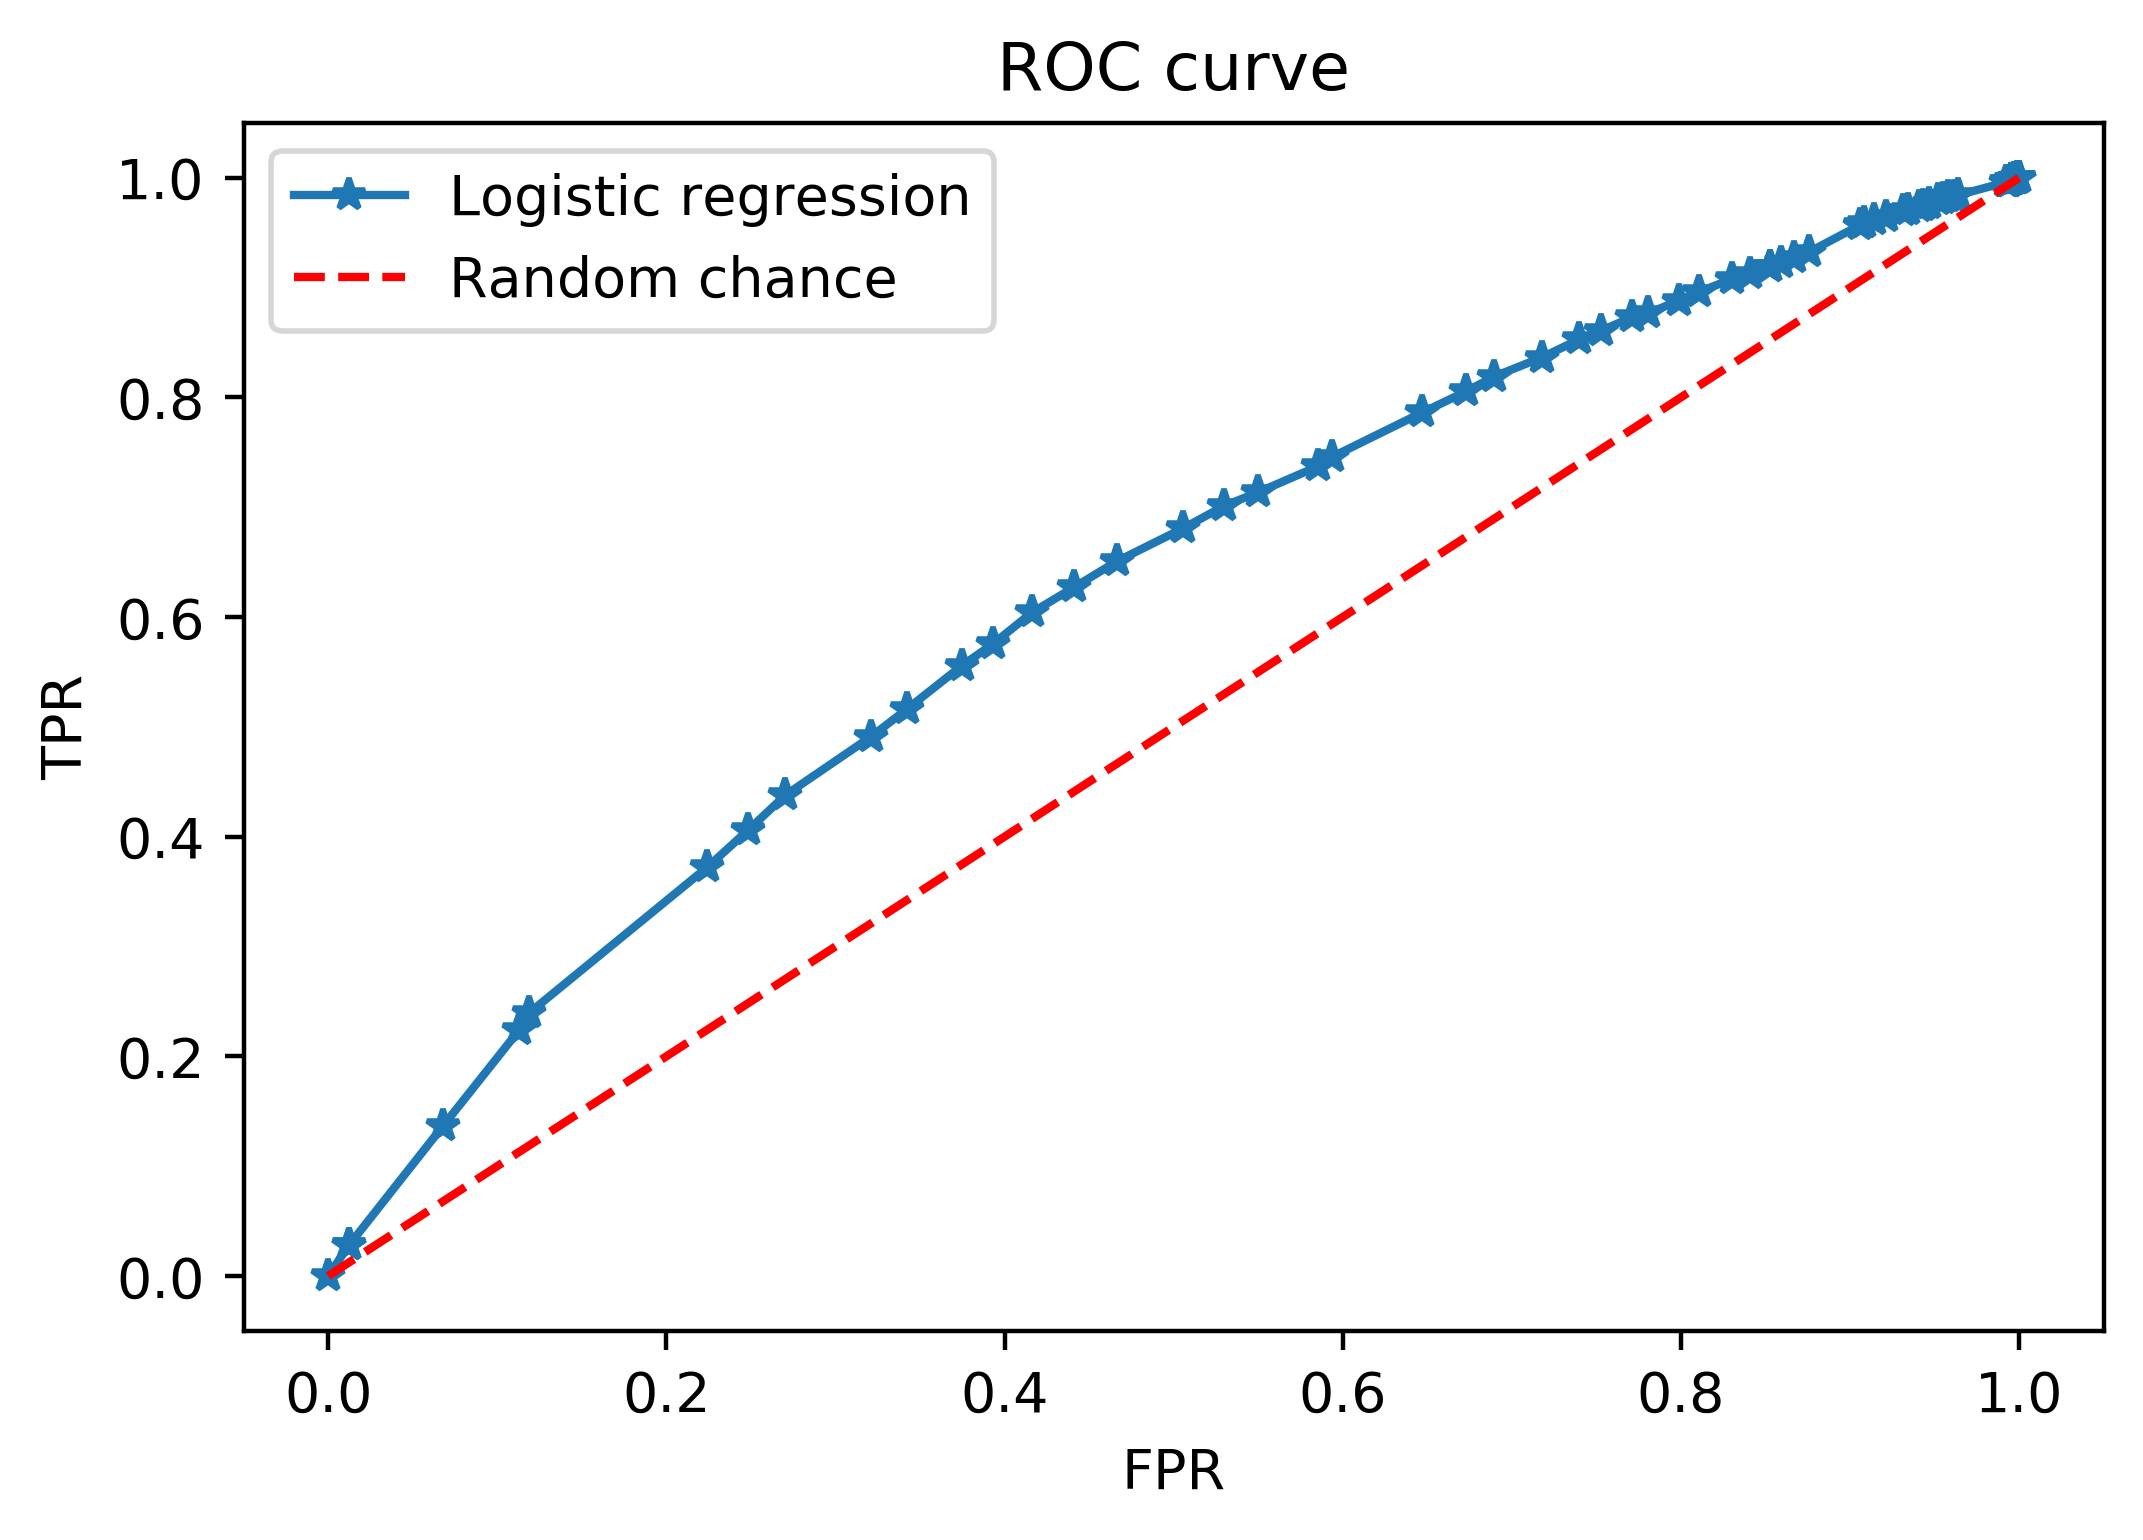

In [44]:
plt.plot(fpr1, tpr1, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

    How is this different, conceptually and quantitatively, from your earlier calculation?
